<a href="https://colab.research.google.com/github/grizzlyman81/tensorlflow_learning/blob/main/cat_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download  -d chetankv/dogs-cats-images

100% 434M/435M [00:20<00:00, 22.4MB/s]
100% 435M/435M [00:20<00:00, 22.0MB/s]


In [7]:
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/dogs-cats-images.zip")
zip_ref.extractall()
zip_ref.close()

In [8]:
#Remember to rename it to dogcat before running this
!ls dogcat/dataset/test_set/dogs

dog.4001.jpg  dog.4201.jpg  dog.4401.jpg  dog.4601.jpg	dog.4801.jpg
dog.4002.jpg  dog.4202.jpg  dog.4402.jpg  dog.4602.jpg	dog.4802.jpg
dog.4003.jpg  dog.4203.jpg  dog.4403.jpg  dog.4603.jpg	dog.4803.jpg
dog.4004.jpg  dog.4204.jpg  dog.4404.jpg  dog.4604.jpg	dog.4804.jpg
dog.4005.jpg  dog.4205.jpg  dog.4405.jpg  dog.4605.jpg	dog.4805.jpg
dog.4006.jpg  dog.4206.jpg  dog.4406.jpg  dog.4606.jpg	dog.4806.jpg
dog.4007.jpg  dog.4207.jpg  dog.4407.jpg  dog.4607.jpg	dog.4807.jpg
dog.4008.jpg  dog.4208.jpg  dog.4408.jpg  dog.4608.jpg	dog.4808.jpg
dog.4009.jpg  dog.4209.jpg  dog.4409.jpg  dog.4609.jpg	dog.4809.jpg
dog.4010.jpg  dog.4210.jpg  dog.4410.jpg  dog.4610.jpg	dog.4810.jpg
dog.4011.jpg  dog.4211.jpg  dog.4411.jpg  dog.4611.jpg	dog.4811.jpg
dog.4012.jpg  dog.4212.jpg  dog.4412.jpg  dog.4612.jpg	dog.4812.jpg
dog.4013.jpg  dog.4213.jpg  dog.4413.jpg  dog.4613.jpg	dog.4813.jpg
dog.4014.jpg  dog.4214.jpg  dog.4414.jpg  dog.4614.jpg	dog.4814.jpg
dog.4015.jpg  dog.4215.jpg  dog.4415.jpg  dog.46

In [9]:
import os
num_cats = len(os.listdir("dogcat/dataset/test_set/cats/"))
num_cats

1000

In [10]:
num_dogs = len(os.listdir("dogcat/dataset/test_set/dogs/"))
num_dogs

1000

In [11]:
num_cats = len(os.listdir("dogcat/dataset/training_set/cats/"))
num_cats

4000

In [12]:
# To visualize our images, first let's get the names programmatically
import numpy as np
import pathlib

data_dir = pathlib.Path("dogcat/dataset/training_set/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


In [13]:
#let's view some random images!
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  #Get a random image:
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read the image and plot it uing matplotlib
  img =mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.axis("off")
  print(f"image shape: {img.shape}")
  return img

 

['cat.529.jpg']
image shape: (442, 464, 3)


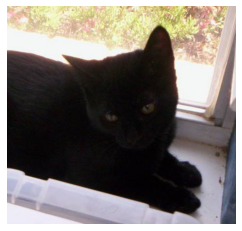

In [14]:
#View a random image from the training dataset
img = view_random_image(target_dir="dogcat/dataset/training_set/", target_class="cats")


In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(442, 464, 3), dtype=uint8, numpy=
array([[[216, 202, 155],
        [209, 196, 151],
        [204, 193, 147],
        ...,
        [202, 184, 174],
        [202, 184, 174],
        [202, 184, 174]],

       [[208, 194, 147],
        [207, 193, 146],
        [205, 192, 147],
        ...,
        [203, 185, 175],
        [203, 185, 175],
        [203, 185, 175]],

       [[215, 198, 152],
        [215, 198, 152],
        [210, 196, 151],
        ...,
        [204, 186, 176],
        [204, 186, 176],
        [204, 186, 176]],

       ...,

       [[238, 236, 249],
        [238, 236, 249],
        [238, 236, 249],
        ...,
        [ 56,  63,  73],
        [ 54,  61,  71],
        [ 52,  59,  69]],

       [[237, 235, 248],
        [238, 236, 249],
        [238, 236, 249],
        ...,
        [ 52,  59,  69],
        [ 50,  57,  65],
        [ 50,  57,  65]],

       [[237, 235, 248],
        [238, 236, 249],
        [238, 236, 249],
        ...,
        [ 54,  58,  6

In [16]:
img.shape

(442, 464, 3)

In [17]:
img/255

array([[[0.84705882, 0.79215686, 0.60784314],
        [0.81960784, 0.76862745, 0.59215686],
        [0.8       , 0.75686275, 0.57647059],
        ...,
        [0.79215686, 0.72156863, 0.68235294],
        [0.79215686, 0.72156863, 0.68235294],
        [0.79215686, 0.72156863, 0.68235294]],

       [[0.81568627, 0.76078431, 0.57647059],
        [0.81176471, 0.75686275, 0.57254902],
        [0.80392157, 0.75294118, 0.57647059],
        ...,
        [0.79607843, 0.7254902 , 0.68627451],
        [0.79607843, 0.7254902 , 0.68627451],
        [0.79607843, 0.7254902 , 0.68627451]],

       [[0.84313725, 0.77647059, 0.59607843],
        [0.84313725, 0.77647059, 0.59607843],
        [0.82352941, 0.76862745, 0.59215686],
        ...,
        [0.8       , 0.72941176, 0.69019608],
        [0.8       , 0.72941176, 0.69019608],
        [0.8       , 0.72941176, 0.69019608]],

       ...,

       [[0.93333333, 0.9254902 , 0.97647059],
        [0.93333333, 0.9254902 , 0.97647059],
        [0.93333333, 0

['cat.3477.jpg']
image shape: (500, 400, 3)
['dog.1435.jpg']
image shape: (336, 447, 3)


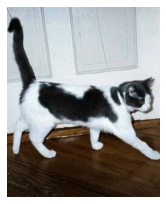

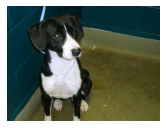

In [18]:
#1 BEcome one with the data (visulize, visulize, visulize)
plt.figure()
plt.subplot(1,2,1)
cat_img = view_random_image("/content/dogcat/dataset/training_set/", "cats")
plt.figure()
plt.subplot(1,2,2)
dog_img = view_random_image("/content/dogcat/dataset/training_set/", "dogs")

In [19]:
#Preprocess the data 
train_dir = "/content/dogcat/dataset/training_set/"
test_dir = "/content/dogcat/dataset/test_set/"

In [20]:
# Baches = Model not looking at all pictures at the same time but in baches
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [21]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [22]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [23]:
len(train_data)

250

In [24]:
#get the 2 first images
images[:2], images.shape, images.dtype

(array([[[[0.4431373 , 0.427451  , 0.38431376],
          [0.48235297, 0.4666667 , 0.42352945],
          [0.45882356, 0.4431373 , 0.40000004],
          ...,
          [0.1764706 , 0.07450981, 0.02352941],
          [0.13725491, 0.04705883, 0.        ],
          [0.18431373, 0.09411766, 0.03137255]],
 
         [[0.427451  , 0.41176474, 0.36862746],
          [0.4784314 , 0.46274513, 0.41960788],
          [0.43529415, 0.41960788, 0.37647063],
          ...,
          [0.1254902 , 0.02352941, 0.        ],
          [0.1764706 , 0.08627451, 0.02352941],
          [0.18039216, 0.09019608, 0.02745098]],
 
         [[0.427451  , 0.41176474, 0.36862746],
          [0.43529415, 0.41960788, 0.37647063],
          [0.45098042, 0.43529415, 0.3921569 ],
          ...,
          [0.2509804 , 0.14901961, 0.09803922],
          [0.12941177, 0.03921569, 0.        ],
          [0.19607845, 0.10588236, 0.04313726]],
 
         ...,
 
         [[0.4666667 , 0.4431373 , 0.3803922 ],
          [0.45490

In [25]:
labels

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

# Create a CNN model (start with a baseline)
A baseline is a realatively simple model or existing result that you setup when beginning a machine learning exprimnet. And as you keep exprimenting to try to beat the baseline

OBS! in deep learning there is almost an infinite amount of architectures you could created. so one of the best ways to get started is to start with something simple and see if it works on your data and then intoduce complexity as required

In [26]:
#Making the creation of our model a little bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Comile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

In [30]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(250, 63)

In [31]:
test_data

In [32]:
# Fit the model
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
250/250 [==============================] - 49s 155ms/step - loss: 0.7206 - accuracy: 0.5919 - val_loss: 0.6734 - val_accuracy: 0.6040
Epoch 2/5
250/250 [==============================] - 38s 152ms/step - loss: 0.5840 - accuracy: 0.6881 - val_loss: 0.6438 - val_accuracy: 0.6480
Epoch 3/5
250/250 [==============================] - 39s 157ms/step - loss: 0.3774 - accuracy: 0.8296 - val_loss: 0.7492 - val_accuracy: 0.6150
Epoch 4/5
250/250 [==============================] - 40s 159ms/step - loss: 0.1626 - accuracy: 0.9410 - val_loss: 1.1405 - val_accuracy: 0.6335
Epoch 5/5
250/250 [==============================] - 38s 153ms/step - loss: 0.0543 - accuracy: 0.9864 - val_loss: 1.5081 - val_accuracy: 0.6340


In [33]:
model_1.evaluate(test_data)

63/63 [==============================] - 7s 117ms/step - loss: 1.5081 - accuracy: 0.6340


[1.5080718994140625, 0.6340000033378601]

<AxesSubplot:>

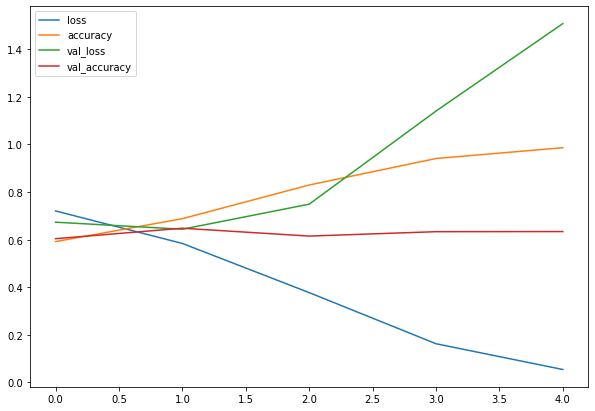

In [34]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

#Plot validation and training curves separatly
def plot_loss_curves(history):
  #Returns seperate loss curves for training and validation metrics

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how mant epochs did we run

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss  ")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_laccuracy ")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

In [35]:
# Hard to see all curves like these, let's separate them into 2 curves one with loss and one with accuracy

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend();

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_accuracy")
  plt.title("accuracy")
  plt.legend();


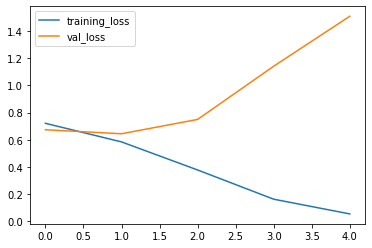

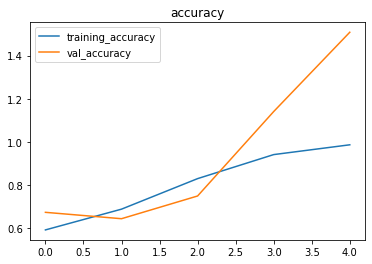

In [36]:
plot_loss_curves(history_1)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [37]:
model_2 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= "sigmoid")
])

In [38]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
250/250 [==============================] - 39s 149ms/step - loss: 0.6566 - accuracy: 0.5956 - val_loss: 0.6093 - val_accuracy: 0.6620
Epoch 2/5
250/250 [==============================] - 36s 143ms/step - loss: 0.5654 - accuracy: 0.7082 - val_loss: 0.5662 - val_accuracy: 0.7050
Epoch 3/5
250/250 [==============================] - 36s 142ms/step - loss: 0.5321 - accuracy: 0.7295 - val_loss: 0.5375 - val_accuracy: 0.7335
Epoch 4/5
250/250 [==============================] - 36s 143ms/step - loss: 0.5031 - accuracy: 0.7535 - val_loss: 0.5523 - val_accuracy: 0.7090
Epoch 5/5
250/250 [==============================] - 40s 159ms/step - loss: 0.4742 - accuracy: 0.7726 - val_loss: 0.5385 - val_accuracy: 0.7300


In [40]:
model_2.evaluate(test_data)

63/63 [==============================] - 7s 113ms/step - loss: 0.5385 - accuracy: 0.7300


[0.5384618043899536, 0.7300000190734863]

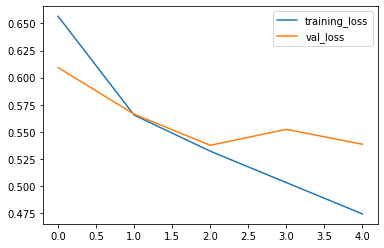

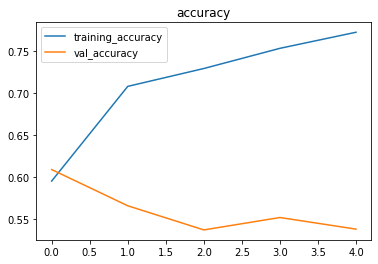

In [41]:
plot_loss_curves(history_2)

In [42]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

**Do you notice what's going on here with the output shape in each MaxPooling2D layer?**

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.

##Validation data = data that the model has not seen before 

In [43]:
# Time to do data augmentation


🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

🔑 #Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [44]:
# Create ImageDataGenerator training instacne with data agumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #How much do you want to rotate your images
                                             shear_range=0.2,
                                             zoom_range=0.2, # Zoom in on a image randomly
                                             width_shift_range=0.2,# Move you image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # Do you want to flip the image?

# Create ImageDataGenerator without data agumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withour data agumentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:
#LEt's write some code to visulize data agumentation
#import data and agument it from training diractory
print("Agumented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False) # For demonstration purposes only


    # create non_agumented train data batche
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(244,244),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=False # Shuffle blandar ordningen på bilderna
                                                 )

IMG_SIZE = (224,224)
# Create non agumented test data batche,
test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(244,244),
                                                 batch_size=32,
                                                 class_mode="binary"

                                                 )

Agumented training data
Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [46]:
# LETS VISULIZE SOME AGUMENTED DATA!!!

# get sample agumented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()# labels are not agumented only data (images) is


showing image number : 7


(-0.5, 223.5, 223.5, -0.5)

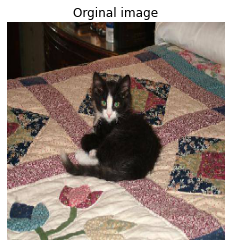

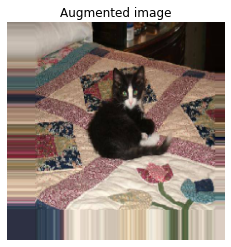

In [47]:
# Show the orignal image and augmented image
import random

random_number = random.randint(0,32)  # Our bachsize is 32
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Orginal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [48]:
random_number

7

In [49]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 8000 images belonging to 2 classes.
Non-augmented training images:
Found 8000 images belonging to 2 classes.
Unchanged test images:
Found 2000 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5)
model_3 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
250/250 [==============================] - 115s 450ms/step - loss: 0.6825 - accuracy: 0.5506 - val_loss: 0.6422 - val_accuracy: 0.6135
Epoch 2/10
250/250 [==============================] - 119s 477ms/step - loss: 0.6490 - accuracy: 0.6151 - val_loss: 0.6387 - val_accuracy: 0.6525
Epoch 3/10
250/250 [==============================] - 114s 457ms/step - loss: 0.6287 - accuracy: 0.6432 - val_loss: 0.5974 - val_accuracy: 0.6760
Epoch 4/10
250/250 [==============================] - 113s 452ms/step - loss: 0.6116 - accuracy: 0.6664 - val_loss: 0.5682 - val_accuracy: 0.7050
Epoch 5/10
250/250 [==============================] - 113s 452ms/step - loss: 0.5805 - accuracy: 0.6910 - val_loss: 0.5574 - val_accuracy: 0.7185
Epoch 6/10
250/250 [==============================] - 113s 454ms/step - loss: 0.5643 - accuracy: 0.7114 - val_loss: 0.5192 - val_accuracy: 0.7375
Epoch 7/10
250/250 [==============================] - 114s 454ms/step - loss: 0.5517 - accuracy: 0.7214 - val_loss: 0.5095 -

# Saving this as text for re-use later

# Create the model (same as model_5)
model_3 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [51]:
model_3.evaluate(test_data)

63/63 [==============================] - 6s 100ms/step - loss: 0.5140 - accuracy: 0.7465


[0.5140424966812134, 0.7465000152587891]

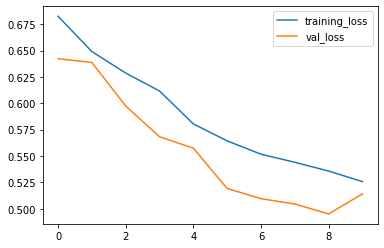

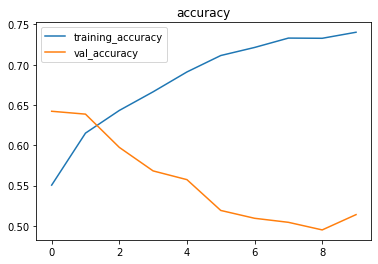

In [52]:
plot_loss_curves(history_3)

In [53]:
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

In [54]:
print("Here are we now")

Here are we now


--2023-03-15 07:28:42--  https://cdn.pixabay.com/photo/2015/11/16/14/43/cat-1045782_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.14.16, 104.18.15.16, 2606:4700::6812:e10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.14.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280535 (274K) [binary/octet-stream]
Saving to: ‘cat-1045782_960_720.jpg’

cat-1045782_960_720 100%[===================>] 273.96K  --.-KB/s    in 0.007s  

2023-03-15 07:28:42 (37.4 MB/s) - ‘cat-1045782_960_720.jpg’ saved [280535/280535]



(-0.5, 959.5, 655.5, -0.5)

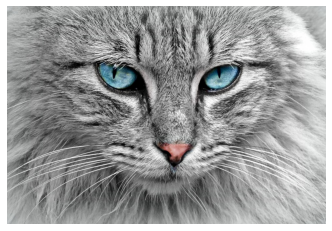

In [55]:
!wget https://cdn.pixabay.com/photo/2015/11/16/14/43/cat-1045782_960_720.jpg
katten = mpimg.imread("cat-1045782_960_720.jpg")
plt.imshow(katten)
plt.axis(False)

In [56]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  # Reads an image from a filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)

  # Read the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all the values between 0 and 1)
  img = img/255

  return img

In [57]:
expand_katt = tf.expand_dims(katten, axis=0)
expand_katt.shape

TensorShape([1, 656, 960, 3])

In [58]:
expand_katt = load_and_prep_image("cat-1045782_960_720.jpg")

In [59]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports  an image located at filename, makes prediction with model and
  plots the image with the predicted class as title
  """
  # Import that target and preprocess it

  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class:
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 182ms/step


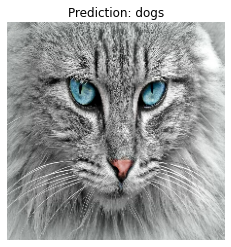

In [60]:
pred_and_plot(model_3,"cat-1045782_960_720.jpg")

--2023-03-15 07:28:43--  https://cdn.arstechnica.net/wp-content/uploads/2022/04/GettyImages-997016774-800x532.jpg
Resolving cdn.arstechnica.net (cdn.arstechnica.net)... 205.234.175.175
Connecting to cdn.arstechnica.net (cdn.arstechnica.net)|205.234.175.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67209 (66K) [image/jpeg]
Saving to: ‘GettyImages-997016774-800x532.jpg’

GettyImages-9970167 100%[===================>]  65.63K   395KB/s    in 0.2s    

2023-03-15 07:28:45 (395 KB/s) - ‘GettyImages-997016774-800x532.jpg’ saved [67209/67209]



(-0.5, 799.5, 531.5, -0.5)

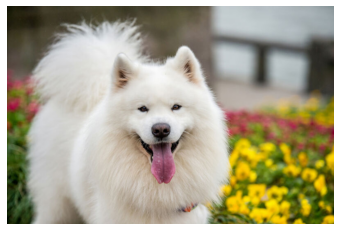

In [61]:
!wget https://cdn.arstechnica.net/wp-content/uploads/2022/04/GettyImages-997016774-800x532.jpg
hunden = mpimg.imread("GettyImages-997016774-800x532.jpg")
plt.imshow(hunden)
plt.axis(False)


1/1 [==============================] - 0s 33ms/step


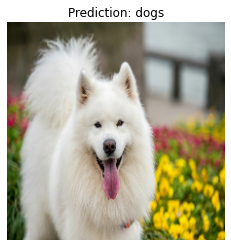

In [62]:
pred_and_plot(model_3,"GettyImages-997016774-800x532.jpg")

In [68]:
# Create the model (same as model_5)
model_4 = Sequential([
    Conv2D(32, 3, activation= 'relu', input_shape= (224,224,3)),
    # Conv2D(24, 3, padding= 'valid',activation= 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(64, 3, padding= 'valid',activation= 'relu'),
    MaxPool2D(),
    Conv2D(84, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(112, 3, padding= 'valid',activation= 'relu'),
    MaxPool2D(),
    Conv2D(110, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(264, 3, padding= 'valid',activation= 'relu'),
    MaxPool2D(),
     Conv2D(124, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(312, 3, padding= 'valid',activation= 'relu'),
    MaxPool2D(),
    Conv2D(144, 3, padding= 'same',activation= 'relu'),
    Conv2D(84, 3, padding= 'valid',activation= 'relu'),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
250/250 [==============================] - 115s 449ms/step - loss: 0.6922 - accuracy: 0.5173 - val_loss: 0.6929 - val_accuracy: 0.5330
Epoch 2/15
250/250 [==============================] - 113s 450ms/step - loss: 0.6898 - accuracy: 0.5282 - val_loss: 0.6700 - val_accuracy: 0.6020
Epoch 3/15
250/250 [==============================] - 112s 450ms/step - loss: 0.6706 - accuracy: 0.5888 - val_loss: 0.6517 - val_accuracy: 0.6145
Epoch 4/15
250/250 [==============================] - 112s 446ms/step - loss: 0.6468 - accuracy: 0.6344 - val_loss: 0.6089 - val_accuracy: 0.6655
Epoch 5/15
250/250 [==============================] - 112s 449ms/step - loss: 0.6346 - accuracy: 0.6432 - val_loss: 0.6029 - val_accuracy: 0.6845
Epoch 6/15
250/250 [==============================] - 113s 451ms/step - loss: 0.6015 - accuracy: 0.6740 - val_loss: 0.5572 - val_accuracy: 0.7150
Epoch 7/15
250/250 [==============================] - 112s 447ms/step - loss: 0.5870 - accuracy: 0.6956 - val_loss: 0.5282 -

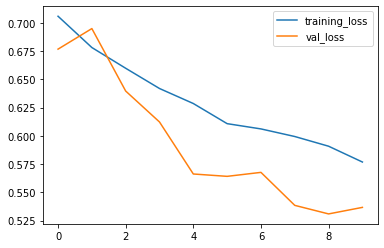

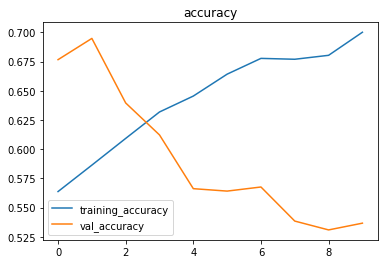

In [64]:
plot_loss_curves(history_4)

In [69]:
model_4.evaluate(test_data)

63/63 [==============================] - 6s 101ms/step - loss: 0.3983 - accuracy: 0.8330


[0.39830511808395386, 0.8330000042915344]